## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## Importing Datasets

In [2]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [7]:
train['Age']=train['Age'].fillna(-0.5)
test['Age']=test['Age'].fillna(-0.5)

In [8]:
train=train.drop(['Cabin'],axis=1)

In [9]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,-0.5,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


## DATA VISUALISATION

Sex
female    74.203822
male      18.890815
Name: Survived, dtype: float64


<AxesSubplot:xlabel='Sex'>

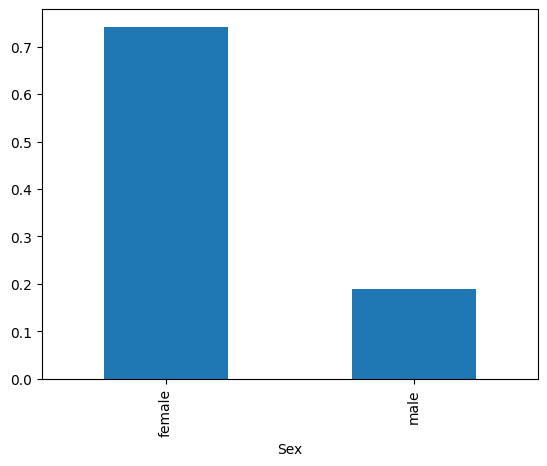

In [10]:
print(train.groupby('Sex').mean()['Survived']*100)
train.groupby('Sex').mean()['Survived'].plot(kind='bar')

74.2% females survived and 18.8% males survived

In [11]:
train['Pclass'].unique()

array([3, 1, 2], dtype=int64)

Pclass
1    62.962963
2    47.282609
3    24.236253
Name: Survived, dtype: float64


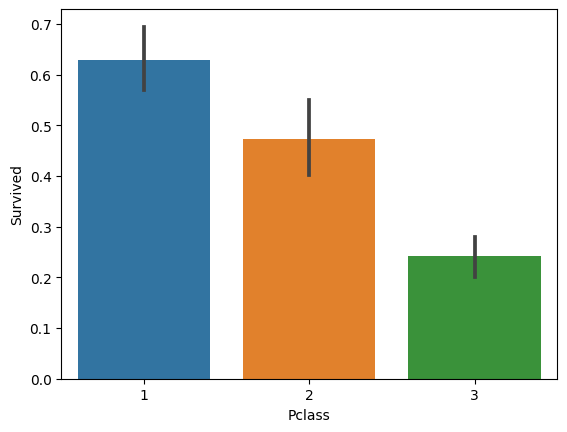

In [12]:
sns.barplot(x='Pclass',y='Survived',data=train)
print(train.groupby('Pclass').mean()['Survived']*100)

Pclass 1 had 62% chances ,Pclass 2 had 47% and Pclass 3 had 24% chances of survival

<AxesSubplot:xlabel='AgeGrp', ylabel='Survived'>

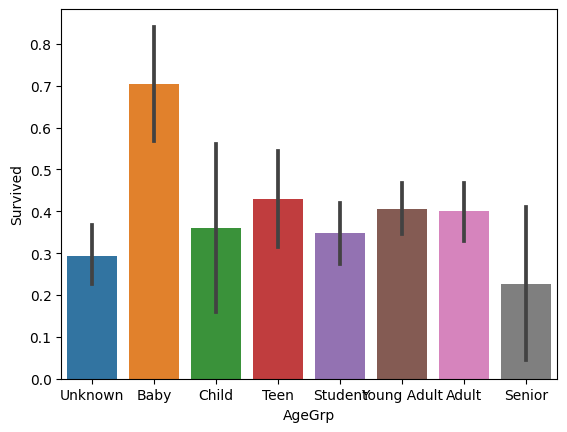

In [13]:
bins=[-1,0,5,12,18,24,35,60,np.inf]
label=['Unknown','Baby','Child','Teen','Student','Young Adult','Adult','Senior']
train['AgeGrp']=pd.cut(train['Age'],bins,labels=label)
test['AgeGrp']=pd.cut(test['Age'],bins,labels=label)

sns.barplot(x='AgeGrp',y='Survived',data=train)

In [14]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,AgeGrp
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Student
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Young Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Young Adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Young Adult


In [15]:
train=train.drop(['Ticket','Fare'],axis=1)
test=test.drop(['Ticket','Fare'],axis=1)

## Dealing with missing values

In [16]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Embarked       2
AgeGrp         0
dtype: int64

In [17]:
test=test.drop(['Cabin'],axis=1)

In [18]:
train['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [19]:
train.groupby('Embarked').mean()['Survived']*100

Embarked
C    55.357143
Q    38.961039
S    33.695652
Name: Survived, dtype: float64

<AxesSubplot:xlabel='Embarked'>

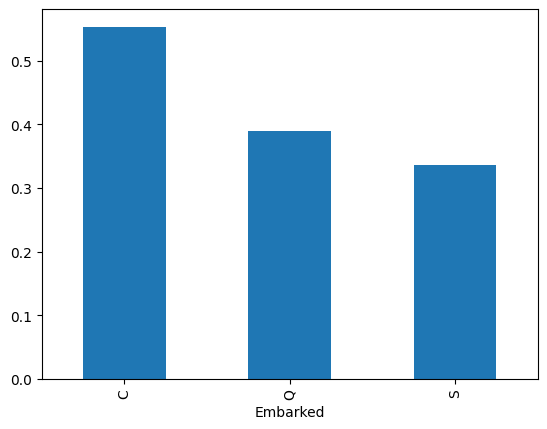

In [20]:
train.groupby('Embarked').mean()['Survived'].plot(kind='bar')

In [21]:
train.groupby('Embarked').size()

Embarked
C    168
Q     77
S    644
dtype: int64

In [22]:
train['Embarked']=train['Embarked'].fillna('S')

In [23]:
train['Embarked'].isnull().sum()

0

In [24]:
combine=[train,test]
for dataset in combine:
    dataset['Title']=dataset.Name.str.extract(' ([A-Za-z]+)\.',expand=False)



In [25]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Embarked,AgeGrp,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,S,Student,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,C,Adult,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,S,Young Adult,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,S,Young Adult,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,S,Young Adult,Mr


In [26]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Embarked,AgeGrp,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,Q,Young Adult,Mr
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,S,Adult,Mrs
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,Q,Senior,Mr
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,S,Young Adult,Mr
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,S,Student,Mrs


In [27]:
train['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

In [28]:
for dataset in combine:
    dataset['Title']=dataset['Title'].replace(['Don','Rev','Capt','Major','Col','Dona','Jonkheer','Dr'],'Rare')
    dataset['Title']=dataset['Title'].replace(['Lady','Countess','Sir'],'Royal')
    dataset['Title']=dataset['Title'].replace('Mlle','Miss')
    dataset['Title']=dataset['Title'].replace('Ms','Miss')
    dataset['Title']=dataset['Title'].replace('Mme','Mrs')
    

In [29]:
train.groupby('Title').mean()['Survived']

Title
Master    0.575000
Miss      0.702703
Mr        0.156673
Mrs       0.793651
Rare      0.250000
Royal     1.000000
Name: Survived, dtype: float64

In [30]:
title_mapping={'Mr':1,'Miss':2,'Mrs':3,'Master':4,'Royal':5,'Rare':6}
for dataset in combine:
    dataset['Title']=dataset['Title'].map(title_mapping)
    dataset['Title']=dataset['Title'].fillna(0)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Embarked,AgeGrp,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,S,Student,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,C,Adult,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,S,Young Adult,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,S,Young Adult,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,S,Young Adult,1


In [33]:
mr_age=train[train['Title']==1]['AgeGrp'].mode() #Young Adult
miss_age=train[train['Title']==2]['AgeGrp'].mode() # Student
mrs_age=train[train['Title']==3]['AgeGrp'].mode() #Adult
master_age=train[train['Title']==4]['AgeGrp'].mode() #Baby
royal_age=train[train['Title']==5]['AgeGrp'].mode() #Adult
rare_age=train[train['Title']==6]['AgeGrp'].mode() #Adult

age_title_map={1:'Young Adult',2:'Student',3:'Adult',4:'Baby',5:'Adult',6:'Adult'}

for i in range(len(train['AgeGrp'])):
    if(train['AgeGrp'][i]=='Unknown'):
        train['AgeGrp'][i]=age_title_map[train['Title'][i]]

for i in range(len(test['AgeGrp'])):      
    
    if(test['AgeGrp'][i]=='Unknown'):
        test['AgeGrp'][i]=age_title_map[test['Title'][i]]

In [38]:
train['AgeGrp'].unique()

['Student', 'Adult', 'Young Adult', 'Baby', 'Teen', 'Child', 'Senior']
Categories (8, object): ['Unknown' < 'Baby' < 'Child' < 'Teen' < 'Student' < 'Young Adult' < 'Adult' < 'Senior']

## Converting String features to int using LabelEncoder

In [45]:

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

transform=['Sex','AgeGrp','Embarked']
for i in transform:
    train[i]=le.fit_transform(train[i])
for i in transform:
    test[i]=le.fit_transform(test[i])

In [46]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Embarked,AgeGrp,Title
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,2,4,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,0,0,3
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,2,6,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,2,6,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,2,6,1


# Machine Learning Model

In [51]:
x_train=train.drop(['PassengerId','Survived','Name'],axis=1)
y_train=train['Survived']
x_test=test.drop(['PassengerId','Name'],axis=1)

In [52]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [53]:
pred=lr.predict(x_test)

In [55]:
ids=test['PassengerId']

output=pd.DataFrame({'PassengerId':ids,'Survived':pred})

In [57]:
output.to_csv('submission.csv',index=False)

In [59]:
output.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


## Lets Check the accuracy

In [60]:
original=pd.read_csv('gender_submission.csv')
original.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [76]:
from sklearn.metrics import accuracy_score
pred_acc=accuracy_score(original['Survived'],output['Survived'])

print("Our Output is",pred_acc*100,"% accurate")

Our Output is 95.69377990430623 % accurate
